In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(columns=['day','month','year'],inplace=True)    

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Feature Encoding

df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
## Independent and Dependent Features

X=df.drop(columns=['FWI'])
y=df['FWI']

In [12]:
# Train Test Split

import sklearn.model_selection as train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split.train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [15]:
## Feature Selection based on the correlation
corr=df.corr()

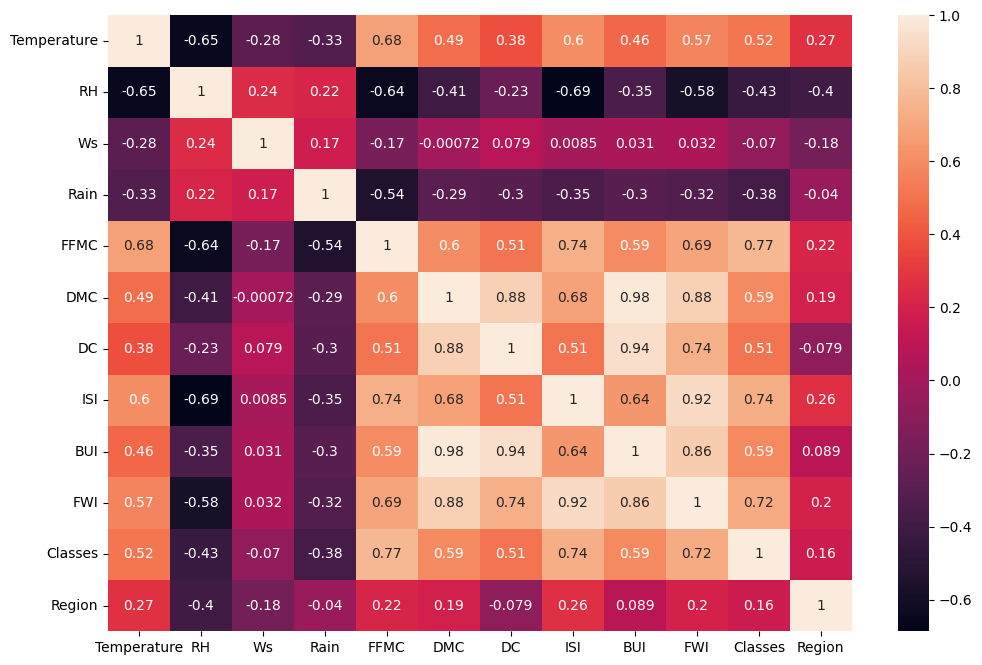

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [17]:
def correlation(dataset,theshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>theshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features=correlation(X_train,0.85)
corr_features

{'DC'}

In [31]:
# Drop features when the correlation is greater than 0.85

X_train.drop(columns=corr_features,inplace=True)
X_test.drop(columns=corr_features,inplace=True)

In [32]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'Box Plot of the Features after Scaling')

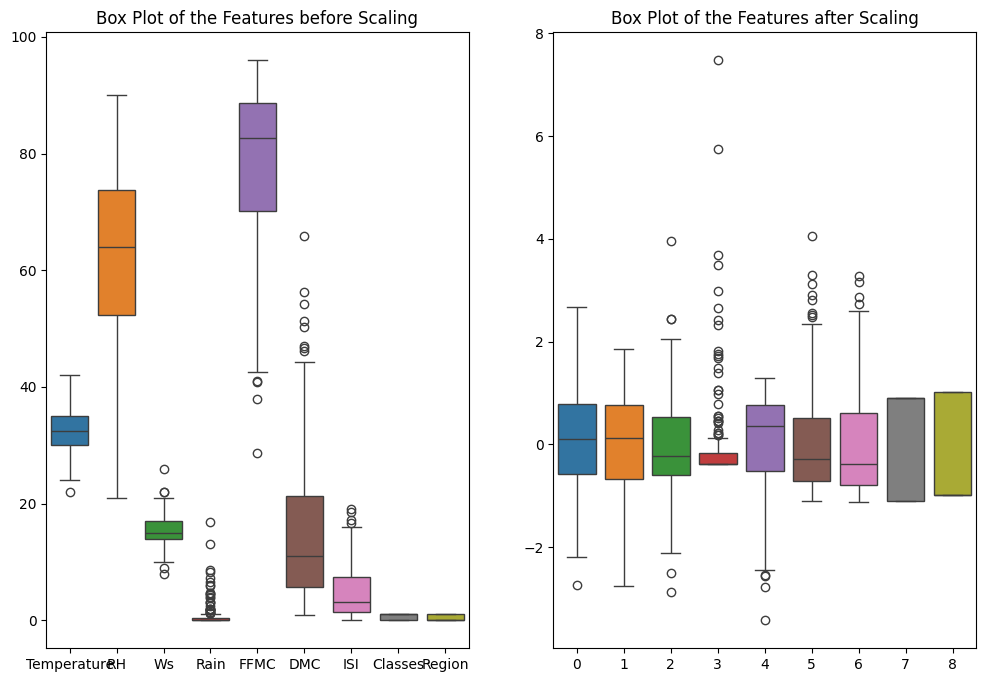

In [36]:
## Box Plots to check the outliers

plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Box Plot of the Features before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('Box Plot of the Features after Scaling')

Applying Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression
linearRegression=LinearRegression()

In [38]:
linearRegression.fit(X_train_scaled,y_train)   

LinearRegression()

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

In [40]:
y_pred=linearRegression.predict(X_test_scaled) 
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 0.674276687379158
R2 Score: 0.9847657384266951


Text(0.5, 1.0, 'Actual vs Predicted Values')

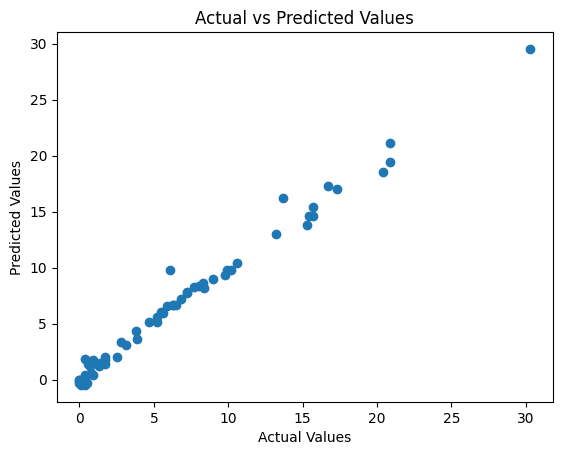

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [42]:
from sklearn.linear_model import Lasso
lasso=Lasso()

The r2 score for Lasso: 0.9492020263112388


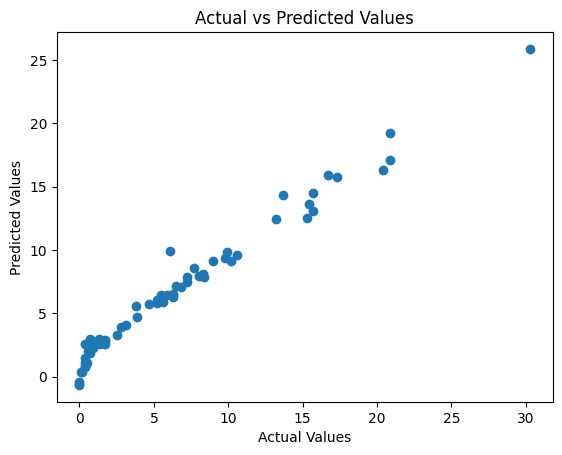

In [52]:
lasso.fit(X_train_scaled,y_train)
print('The r2 score for Lasso:',lasso.score(X_test_scaled,y_test))
y_pred=lasso.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [46]:
from sklearn.linear_model import Ridge
ridge=Ridge()

The r2 score for Ridge: 0.9842993364555512


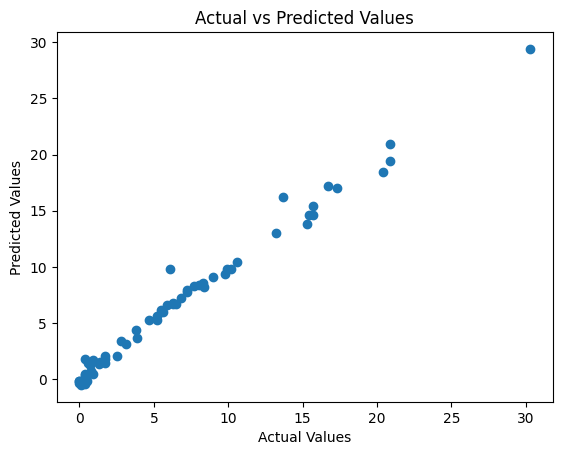

In [48]:
ridge.fit(X_train_scaled,y_train)  
print('The r2 score for Ridge:',ridge.score(X_test_scaled,y_test))
y_pred=ridge.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [49]:
from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet()

The r2 score for ElasticNet: 0.8753460589519703


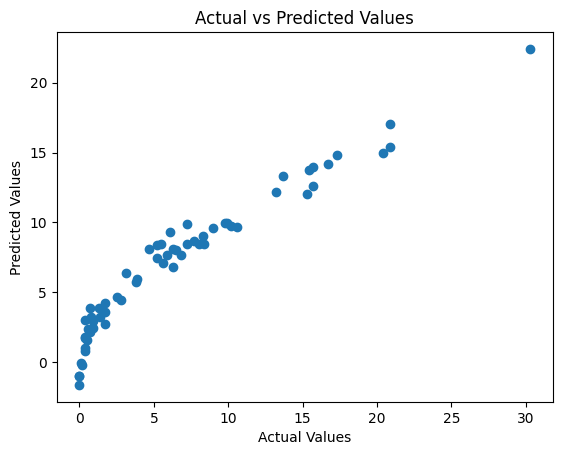

In [51]:
elasticNet.fit(X_train_scaled,y_train)
print('The r2 score for ElasticNet:',elasticNet.score(X_test_scaled,y_test))
y_pred=elasticNet.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()